<img src="http://www.ubu.es/sites/default/files/portal_page/images/logo_color_2l_dcha.jpg" height="150" width="150" align="right"/>

## Collaborative Filtering (1)
[Nacho Santos](www.nacho.santos.name)

## Introduction
The purpose of this assignment is to implement a **collaborative filtering algorithm** in python. This assignment is based on the course “Machine learning” by Andrew N https://www.coursera.org/course/ml. Before starting the work, you should read carefully the cooperative filtering algorithm explained in [class](https://docs.google.com/presentation/d/1OF1gE-ycuI01ds_lXwle6JnrCZMBHKSFgFSBh0LOYlU/edit?usp=sharing). Besides, you can watch the [videos](https://drive.google.com/file/d/0B-Y_cBY4Vgw9dVNrT3VfYU80RWs/view?usp=sharing) from the course Machine Learning where Andrew Ng introduces and explains the collaborative filtering.

On the other hand, it is necessary to use the Numpy library. You can learn the fundaments of Numpy following the next tutorials: [Introduction to Numpy](https://anaconda.org/jismartin/intro_numpy/notebook) and [Introduction to Matplotlib](https://anaconda.org/jismartin/intro_matplotlib/notebook)

The work is divided into progressive parts. Some functions have already been implemented to help you to test the code. These functions are in the python file **"recommender_systema.py"** provided with this interactive notebook. 

**Your task is to complete the python code when you are asked to do it**.

## Import python packages

In [1]:
import numpy,pandas as np
import matplotlib.pyplot as plt

In [2]:
# This line is necessary to show matplotlib plots inside the jupyter notebook
%matplotlib inline

## 1. Download movies database and prepare data
**Download** movielens 100k dataset **"ml-100k.zip"** from http://grouplens.org/datasets/movielens/100k/
The file "README.TXT" describes tha dataset composed by different files. In particular, you only need the files:
* "u.data" that contains the ratings on scale 1 to 5. Users and items are numbered consecutively from 1. The data is randomly ordered in rows with the next format: *user_id | item_id | rating | timestamp*
* "u.item" that contains the information about the movies

**Copy these two files** into the working folder of the jupyter notebook

### 1.1 Import data

Fisrt, we import the names of the movies. We use the Pandas library (http://pandas.pydata.org/) to read the "u.item", remove all unnecessary values and keep only the names.

In [3]:
# import pandas
from pandas import read_table
# read csv file
items = read_table('u.item',header=None,sep='|',encoding='ISO-8859-1')
# remove collumns 2-24
items.drop(range(2,24),axis=1, inplace=True)
# name the columns
items.columns = ['itemid','title']
# show the first 5 rows of the dataframe
items.head()

,itemid,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


The dataframe "items" contains the column "itemid" with the Movielens index of each movie, and the column "title"  with the title of each movie. If you want to get the name of the i-th movie, you can use the method *iloc*

In [4]:
# Supongamos que deseas obtener el nombre de la película en el índice i
i = 24  # Reemplaza esto con el índice de la película que deseas

# Usa iloc para obtener el nombre de la película en el índice i
movie_name = items.iloc[i]['title']

# Imprime el nombre de la película
print(f"Nombre de la película en el índice {i}: {movie_name}")


Nombre de la película en el índice 24: Birdcage, The (1996)


### Task 1
***
Now, **you have to import** the ratings from the file 'u.data'. 
#### Tips
* You can read a text file into a Numpy array using the function [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) (use the *delimiter='\t'* to split columns)

In [5]:
import numpy as np

# Ruta al archivo 'u.data' en tu carpeta de trabajo de Jupyter
file_path = 'u.data'

# Usamos la función genfromtxt para cargar los datos desde el archivo
# Utilizamos '\t' como delimitador para dividir las columnas, ya que el archivo está en formato de tabulación.
ratings_data = np.genfromtxt(file_path, delimiter='\t', dtype=int)

# Ahora, ratings_data contiene los datos del archivo 'u.data'
# Puedes trabajar con esta matriz NumPy para analizar las calificaciones.

print(ratings_data[:5])

[[      196       242         3 881250949]
 [      186       302         3 891717742]
 [       22       377         1 878887116]
 [      244        51         2 880606923]
 [      166       346         1 886397596]]


### 1.2 Build arrays Y, R

### Task 2
***
Now, **you have to build** the matrices Y and R. 

The *n_movies x n_users (mxu)* matrix Y represents (by columns) the ratings that each user gave to the movies she watched

$Y=\begin{bmatrix}y^{(1,1)} & ...& y^{(1,u)} \\. & ...& .\\y^{(m,1)} & ...& y^{(m,u)} \end{bmatrix}$

The matrix R is complementary to Y. R has the same dimension of Y, i.e. *n_movies x n_users (mxu)*, and represents (by columns) if a user watched a movie (1) or did not (0).

$R=\begin{bmatrix}r^{(1,1)} & ...& r^{(1,u)} \\. & ...& .\\r^{(m,1)} & ...& r^{(m,u)} \end{bmatrix}$

where

$r^{(i,j)}=\begin{cases}1 & user(j) \ watched \ movie(i)\\0 & otherwise\end{cases}$

#### Tips
* Remember that in Numpy the index array always starts with 0, i.e. the row 0 of the matrix Y represents the ratings of the movie 1 of Movielens database, similarly, the column 0 of the matrix Y represents the ratings of the user 1 of the Movielens database.
* The Numpy function **unique()** returns the sorted unique elements of an array; it may be useful to get the list of users and movies from the rating database
* The Numpy function **zeros()** returns a matrix of zeros 
* Supposing a Numpy array A, the function **A.shape[0]** returns the number of rows, and **A.shape[1]** the number of columns

In [6]:
# Ruta al archivo 'u.data' en tu carpeta de trabajo de Jupyter
file_path_ratings = 'u.data'

# Leer el archivo 'u.data' y crear las matrices "Y" y "R"
ratings_data = np.genfromtxt(file_path_ratings, delimiter='\t', dtype=int)

# Contar el número único de usuarios y películas
num_users = len(np.unique(ratings_data[:, 0]))
num_movies = len(np.unique(ratings_data[:, 1]))

# Inicializar la matriz "Y" con ceros
Y = np.zeros((num_movies, num_users))

# Inicializar la matriz "R" con ceros
R = np.zeros((num_movies, num_users))

# Llenar las matrices "Y" y "R" con los datos del archivo 'u.data'
for row in ratings_data:
    user_id = row[0]
    movie_id = row[1]
    rating = row[2]
    
    # Asegúrate de restar 1 para ajustar a los índices de Python que comienzan en 0
    Y[movie_id - 1, user_id - 1] = rating
    R[movie_id - 1, user_id - 1] = 1

# Imprimir una muestra de las matrices Y y R
print("Matriz Y:")
print(Y[:5, :5])  # Imprime las primeras 5 filas y 5 columnas de Y

print("\nMatriz R:")
print(R[:5, :5])  # Imprime las primeras 5 filas y 5 columnas de R

Matriz Y:
[[5. 4. 0. 0. 4.]
 [3. 0. 0. 0. 3.]
 [4. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0.]]

Matriz R:
[[1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [7]:
Y

array([[5., 4., 0., ..., 5., 0., 0.],
       [3., 0., 0., ..., 0., 0., 5.],
       [4., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 1.3 Using matrices Y and R

### Task 3
***
**Answer** the next questions:
1. How many movies did the Movielens user 12 watch?
2. What is the minimum rating of the Movielens user 12 ? And the maximum?
3. What is the maximum rating of the Movielens user 12 ?
4. What are the movie indices that the Movielens user 12 watched? And the user 11?
5. What are the movie indices that both the Movielens user 12 and 11 watched?

#### Tips
* The Numpy function **where(A>0)** returns the indices of the elements of A where the condition >0 is true


In [8]:
# Task: explore Y and R
# YOUR CODE ..................................

import numpy as np

# Supongamos que el usuario 12 tiene un índice de 11 en las matrices
user_12_index = 11

# 1. Cuántas películas vio el usuario 12
movies_watched_by_user_12 = np.where(R[user_12_index] == 1)
num_movies_watched_by_user_12 = len(movies_watched_by_user_12[0])

# 2. Calificación mínima y máxima del usuario 12
ratings_of_user_12 = Y[user_12_index, movies_watched_by_user_12]
min_rating_user_12 = np.min(ratings_of_user_12)
max_rating_user_12 = np.max(ratings_of_user_12)

# 3. Calificación máxima del usuario 12
max_rating_user_12 = np.max(Y[user_12_index])

# 4. Índices de películas que el usuario 12 y el usuario 11 vieron
user_11_index = 10  # Suponiendo que el usuario 11 tiene un índice de 10 en las matrices
movies_watched_by_user_11 = np.where(R[user_11_index] == 1)
common_movies_user_12_11 = np.intersect1d(movies_watched_by_user_12, movies_watched_by_user_11)

# Imprimir las respuestas
print(f"1. El usuario 12 vio {num_movies_watched_by_user_12} películas.")
print(f"2. Calificación mínima del usuario 12: {min_rating_user_12}. Calificación máxima: {max_rating_user_12}.")
print(f"3. Calificación máxima del usuario 12: {max_rating_user_12}.")
print(f"4. Índices de películas que el usuario 12 y el usuario 11 vieron: {common_movies_user_12_11}")







1. El usuario 12 vio 267 películas.
2. Calificación mínima del usuario 12: 1.0. Calificación máxima: 5.0.
3. Calificación máxima del usuario 12: 5.0.
4. Índices de películas que el usuario 12 y el usuario 11 vieron: [  0   6   9  10  12  15  23  27  42  48  57  58  63  89  91  93  98 108
 109 114 116 118 120 129 144 155 173 174 176 177 200 206 212 213 215 221
 233 245 248 255 267 270 271 275 279 290 292 296 300 302 304 307 313 326
 327 328 331 333 338 341 342 343 344 345 346 362 373 377 386 390 392 398
 404 405 415 416 420 424 428 434 436 441 446 449 452 453 454 456 471 473
 477 486 492 496 497 498 513 520 521 526 531 536 537 541 542 550 559 560
 565 576 591 602 605 609 617 621 626 628 629 631 639 642 653 654 662 665
 670 681 685 692 714 726 736 746 757 762 772 787 804 832 845 850 853 861
 863 866 869 879 882 885 888 891 895 902 912 915 918 932 942]


### 1.4 Checking Y and R

### Task 4
***
Check the matrices Y and R computed above by calculating some statistics (your values must be equal to the values shown below)

* number of users: 943
* number of movies: 1682
* dimension of Y: (1682,943)
* dimension of R: (1682,943)
* number of ratings: 100000
* number of nonzero elements of R: 100000
* average rating: 3.5299
* maximum rating: 5.0000
* minimum rating: 1.0000
* average rating of the movie 1: 3.8783
* average rating of the movie 10: 3.8315
* average rating of the movie 100: 4.1555
* average rating of the movie 1000: 3.0000 
* average rating of the user 1: 3.6103
* average rating of the user 10: 4.2065
* average rating of the user 100: 3.0678
* average rating of the user 900: 2.5556

#### Tips
* Suppose the user i. Note that the average of ratings is over the movies that user i watched, so you have to consider only the values Y(j,i) such as the corresponding R(j,i) is equal to one.

In [9]:
# Task: check Y and R
# YOUR CODE ..................................

import numpy as np

# Número de usuarios
num_users = Y.shape[1]

# Número de películas
num_movies = Y.shape[0]

# Número de calificaciones totales
num_ratings = R.sum()

# Número de elementos no nulos de R
num_nonzero_elements_R = np.sum(R)

# Calificación promedio
average_rating = Y[R == 1].mean()

# Calificación máxima y mínima
max_rating = Y[R == 1].max()
min_rating = Y[R == 1].min()

# Calificación promedio por película
average_rating_movie_1 = Y[0, R[0] == 1].mean()
average_rating_movie_10 = Y[9, R[9] == 1].mean()
average_rating_movie_100 = Y[99, R[99] == 1].mean()

# Calificación promedio de la película 1000 (verificar si la película existe)
movie_index_1000 = 999  # Índice de la película 1000
if movie_index_1000 < Y.shape[0]:
    average_rating_movie_1000 = Y[movie_index_1000, R[movie_index_1000] == 1].mean()
else:
    average_rating_movie_1000 = 0.0  # Otra acción, si la película no existe

# Calificación promedio por usuario
average_rating_user_1 = Y[:, 0][R[:, 0] == 1].mean()
average_rating_user_10 = Y[:, 9][R[:, 9] == 1].mean()
average_rating_user_100 = Y[:, 99][R[:, 99] == 1].mean()
average_rating_user_900 = Y[:, 899][R[:, 899] == 1].mean()




# Imprimir las estadísticas
print(f"Número de usuarios: {num_users}")
print(f"Número de películas: {num_movies}")
print(f"Dimensión de Y: {Y.shape}")
print(f"Dimensión de R: {R.shape}")
print(f"Número de calificaciones: {num_ratings}")
print(f"Número de elementos no nulos de R: {num_nonzero_elements_R:.0f}")
print(f"Calificación promedio: {average_rating:.4f}")
print(f"Calificación máxima: {max_rating:.4f}")
print(f"Calificación mínima: {min_rating:.4f}")
print(f"Calificación promedio de la película 1: {average_rating_movie_1:.4f}")
print(f"Calificación promedio de la película 10: {average_rating_movie_10:.4f}")
print(f"Calificación promedio de la película 100: {average_rating_movie_100:.4f}")
print(f"Calificación promedio de la película 1000: {average_rating_movie_1000:.4f}")
print(f"Calificación promedio del usuario 1: {average_rating_user_1:.4f}")
print(f"Calificación promedio del usuario 10: {average_rating_user_10:.4f}")
print(f"Calificación promedio del usuario 100: {average_rating_user_100:.4f}")
print(f"Calificación promedio del usuario 900: {average_rating_user_900:.4f}")







Número de usuarios: 943
Número de películas: 1682
Dimensión de Y: (1682, 943)
Dimensión de R: (1682, 943)
Número de calificaciones: 100000.0
Número de elementos no nulos de R: 100000
Calificación promedio: 3.5299
Calificación máxima: 5.0000
Calificación mínima: 1.0000
Calificación promedio de la película 1: 3.8783
Calificación promedio de la película 10: 3.8315
Calificación promedio de la película 100: 4.1555
Calificación promedio de la película 1000: 3.0000
Calificación promedio del usuario 1: 3.6103
Calificación promedio del usuario 10: 4.2065
Calificación promedio del usuario 100: 3.0678
Calificación promedio del usuario 900: 2.5556


### 1.5 Sparse matrix Y

### Task 5
***
You can use the Numpy function **matshow()** to show that the matrix Y is sparse (most values are zero because they correspond to movies that have not been watched). You should get a plot similar to the next one:
<img src="https://goo.gl/dk84YT" height="400" width="300" align="centre"/>

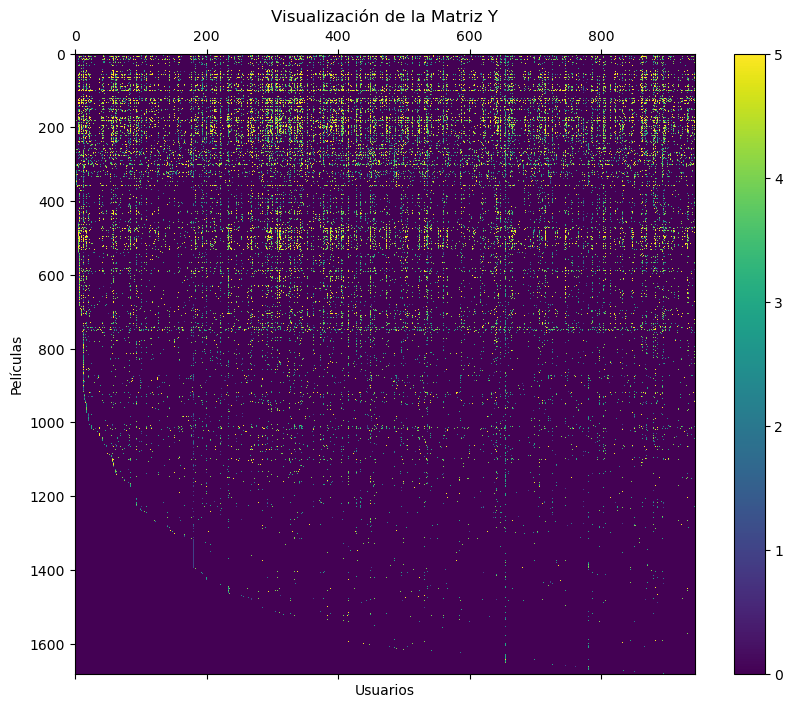

In [10]:
# Task: show matrix Y
# YOUR CODE ..................................

import matplotlib.pyplot as plt

# Usamos matshow para visualizar la matriz Y
plt.figure(figsize=(10, 8))  # Puedes ajustar el tamaño según tus necesidades
plt.matshow(Y, fignum=1, aspect='auto')  # 'aspect' controla la proporción de la visualización

plt.title("Visualización de la Matriz Y")
plt.xlabel("Usuarios")
plt.ylabel("Películas")
plt.colorbar()  # Añadir una barra de colores para representar los valores de las calificaciones

plt.show()







### 1.6 Save variables

### Task 6
***
Finally, save the matrices Y and R so you can load them in another notebook.

In [11]:
# Task: save a matrix Y and R
# YOUR CODE ..................................
import numpy as np

# Guardar la matriz Y
np.save('matriz_Y.npy', Y)

# Guardar la matriz R
np.save('matriz_R.npy', R)





